<a href="https://colab.research.google.com/github/kenanmorani/Images_Preprocessing/blob/main/COV19D_CT_images_Processing_Using_Contour_Cropping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CROPPING IMAGES WITH COUNTORS USING PYTHON-OPEN-CV - version 4.1.2
### Images were in grayscale, gussian blurred, binarazed with a threshhold, eroded and dilated before contour was found for cropping.

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
!pip install imutils

In [59]:
cv2.__version__

'4.1.2'

In [47]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from tensorflow.keras import activations
from tensorflow.keras.models import Sequential
from termcolor import colored  

import keras
from tensorflow.keras import regularizers
from keras.regularizers import l2

#import visualkeras
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from collections import defaultdict

from PIL import ImageFont

from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

import pandas as pd

import csv
import scipy

In [48]:
import cv2
import imutils

In [49]:
def crop_chest_contour(image, plot=False):
    
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    # extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image

In [54]:
file_path = '/content/drive/MyDrive/Covid_data/Training Set/covid/covid/ct_scan_2/10.jpg'
image = cv2.imread(file_path)

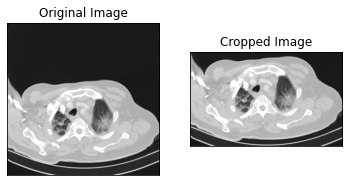

array([[[ 90,  90,  90],
        [ 58,  58,  58],
        [ 43,  43,  43],
        ...,
        [ 22,  22,  22],
        [ 24,  24,  24],
        [ 26,  26,  26]],

       [[ 97,  97,  97],
        [ 67,  67,  67],
        [ 51,  51,  51],
        ...,
        [ 25,  25,  25],
        [ 27,  27,  27],
        [ 26,  26,  26]],

       [[113, 113, 113],
        [ 75,  75,  75],
        [ 53,  53,  53],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       ...,

       [[ 25,  25,  25],
        [ 28,  28,  28],
        [ 28,  28,  28],
        ...,
        [ 24,  24,  24],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       [[ 26,  26,  26],
        [ 27,  27,  27],
        [ 25,  25,  25],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[ 24,  24,  24],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 27,  27,  27]]

In [55]:
crop_chest_contour(image,True)

REFERENCES:
https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection/code